In [1]:
import pandas as pd
import numpy as np
import os
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("../data/processed/lamudi_final_clean.csv")

print("Dataset loaded:", df.shape)
df.head()

Dataset loaded: (1000, 20)


,id,title,price,address,num_of_bedrooms,num_of_bathrooms,floor_area,description,list_of_amenities,image_urls,property_url,local_images,city,full_text,log_price,title_length,description_length,amenities_parsed,amenity_count,num_images
0,1,1BEDROOM CONDO UNIT FOR SALE AT GOLD RESIDENCE...,6973985.0,"Ninoy Aquino Avenue, Brgy. Sto. Niño, Parañaqu...",1.0,1.0,25.0,"GOLD RESIDENCES!!! Across NAIA Terminal 1, Par...","cctv, utility room, air conditioning, alarm sy...",https://static-ph.lamudi.com/static/media/bm9u...,https://www.lamudi.com.ph/projects/gold-reside...,"['A1.1.jpg', 'A1.2.jpg', 'A1.3.jpg', 'A1.4.jpg...",Parañaque,bedroom condo unit for sale gold residences ac...,15.757697,69,1066,"['cctv', 'utility room', 'air conditioning', '...",24,5
1,2,"1 Bedroom w/ balcony For Sale Le Pont Tower 2,...",14829797.0,"Bridgetowne East, Eulogio Amang Rodriguez Ave....",1.0,1.0,45.0,LE PONT RESIDENCES TOWER 2 Completion Date: Se...,"cctv, air conditioning, alarm system, billiard...",https://static-ph.lamudi.com/static/media/bm9u...,https://www.lamudi.com.ph/buy/metro-manila/pas...,"['A2.1.jpg', 'A2.2.jpg', 'A2.3.jpg', 'A2.4.jpg...",Pasig,bedroom balcony for sale pont tower bridgetown...,16.512149,69,1792,"['cctv', 'air conditioning', 'alarm system', '...",35,5
2,3,Operational Resort for Sale | OR01 | San Narci...,60000000.0,"Alusiis, San Narciso",0.0,0.0,0.0,Take over this income-generating resort in a 1...,"air conditioning, alarm system, cctv, driver's...",https://static-ph.lamudi.com/static/media/bm9u...,https://www.lamudi.com.ph/buy/zambales/san-nar...,"['A3.1.jpg', 'A3.2.jpg', 'A3.3.jpg', 'A3.4.jpg...",San Narciso,operational resort for sale or san narciso zam...,17.909855,58,2322,"['air conditioning', 'alarm system', 'cctv', ""...",12,5
3,4,1 Bedroom Loft-Type Condo For Sale in Bellagio...,15000000.0,"Fort Bonifacio, Taguig",1.0,2.0,58.0,UNIT DESCRIPTION: 1 Bedroom 2 Toilet and Bath ...,"gymnasium, air conditioning, alarm system, ele...",https://static-ph.lamudi.com/static/media/bm9u...,https://www.lamudi.com.ph/projects/the-bellagi...,"['A4.1.jpg', 'A4.2.jpg', 'A4.3.jpg', 'A4.4.jpg...",Taguig,bedroom loft type condo for sale bellagio tagu...,16.523561,61,940,"['gymnasium', 'air conditioning', 'alarm syste...",18,5
4,5,For Sale 2 Bedroom Rent to Own Condo in Floren...,16920000.0,"Florence Way, 1634 Taguig City, Philippines\n ...",2.0,3.0,79.0,THE FLORENCE RESIDENCES READY FOR OCCUPANCY | ...,"gymnasium, cctv, utility room, indoor pool, ai...",https://static-ph.lamudi.com/static/media/bm9u...,https://www.lamudi.com.ph/buy/metro-manila/tag...,"['A5.1.jpg', 'A5.2.jpg', 'A5.3.jpg', 'A5.4.jpg...",Taguig,for sale bedroom rent own condo florence mckin...,16.644007,75,1253,"['gymnasium', 'cctv', 'utility room', 'indoor ...",63,5


In [3]:
numeric_cols_to_clean = ["num_of_bedrooms", "num_of_bathrooms", "floor_area"]

for col in numeric_cols_to_clean:
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [4]:
# Title word count
df["title_word_count"] = df["title"].fillna("").apply(lambda x: len(x.split()))

# Description word count
df["description_word_count"] = df["description"].fillna("").apply(lambda x: len(x.split()))

# Address length
df["address_length"] = df["address"].fillna("").apply(len)

df.head()


,id,title,price,address,num_of_bedrooms,num_of_bathrooms,floor_area,description,list_of_amenities,image_urls,...,full_text,log_price,title_length,description_length,amenities_parsed,amenity_count,num_images,title_word_count,description_word_count,address_length
0,1,1BEDROOM CONDO UNIT FOR SALE AT GOLD RESIDENCE...,6973985.0,"Ninoy Aquino Avenue, Brgy. Sto. Niño, Parañaqu...",1.0,1.0,25.0,"GOLD RESIDENCES!!! Across NAIA Terminal 1, Par...","cctv, utility room, air conditioning, alarm sy...",https://static-ph.lamudi.com/static/media/bm9u...,...,bedroom condo unit for sale gold residences ac...,15.757697,69,1066,"['cctv', 'utility room', 'air conditioning', '...",24,5,11,175,114
1,2,"1 Bedroom w/ balcony For Sale Le Pont Tower 2,...",14829797.0,"Bridgetowne East, Eulogio Amang Rodriguez Ave....",1.0,1.0,45.0,LE PONT RESIDENCES TOWER 2 Completion Date: Se...,"cctv, air conditioning, alarm system, billiard...",https://static-ph.lamudi.com/static/media/bm9u...,...,bedroom balcony for sale pont tower bridgetown...,16.512149,69,1792,"['cctv', 'air conditioning', 'alarm system', '...",35,5,13,303,127
2,3,Operational Resort for Sale | OR01 | San Narci...,60000000.0,"Alusiis, San Narciso",0.0,0.0,0.0,Take over this income-generating resort in a 1...,"air conditioning, alarm system, cctv, driver's...",https://static-ph.lamudi.com/static/media/bm9u...,...,operational resort for sale or san narciso zam...,17.909855,58,2322,"['air conditioning', 'alarm system', 'cctv', ""...",12,5,10,348,20
3,4,1 Bedroom Loft-Type Condo For Sale in Bellagio...,15000000.0,"Fort Bonifacio, Taguig",1.0,2.0,58.0,UNIT DESCRIPTION: 1 Bedroom 2 Toilet and Bath ...,"gymnasium, air conditioning, alarm system, ele...",https://static-ph.lamudi.com/static/media/bm9u...,...,bedroom loft type condo for sale bellagio tagu...,16.523561,61,940,"['gymnasium', 'air conditioning', 'alarm syste...",18,5,11,156,22
4,5,For Sale 2 Bedroom Rent to Own Condo in Floren...,16920000.0,"Florence Way, 1634 Taguig City, Philippines\n ...",2.0,3.0,79.0,THE FLORENCE RESIDENCES READY FOR OCCUPANCY | ...,"gymnasium, cctv, utility room, indoor pool, ai...",https://static-ph.lamudi.com/static/media/bm9u...,...,for sale bedroom rent own condo florence mckin...,16.644007,75,1253,"['gymnasium', 'cctv', 'utility room', 'indoor ...",63,5,14,187,105


In [5]:
# Extract top 20 amenities
all_amenities = df["amenities_parsed"].dropna().explode()
top_amenities = all_amenities.value_counts().head(20).index.tolist()

for amen in top_amenities:
    df[f"amenity_{amen.lower().replace(' ', '_')}"] = df["amenities_parsed"].apply(
        lambda x: amen in x if isinstance(x, list) else False
    )

df.head()


,id,title,price,address,num_of_bedrooms,num_of_bathrooms,floor_area,description,list_of_amenities,image_urls,...,"amenity_['fire_exits',_'basketball_court',_'jogging_path',_'playground',_'secure_parking',_'sports_facilities',_'swimming_pool']","amenity_['cctv',_'bar',_'elevators',_'entertainment_room',_'fire_exits',_'fitness_center',_'function_room',_'lobby',_'lounge',_'reception_area',_'fire_alarm',_'fire_sprinkler_system',_'24-hour_security',_'shops',_'basketball_court',_'shower_rooms',_'swimming_pool']","amenity_['cctv',_'elevators',_'fire_exits',_'fitness_center',_'function_room',_'game_room',_'gym',_'lobby',_'lounge',_'reception_area',_'fire_alarm',_'fire_sprinkler_system',_'24-hour_security',_'basketball_court',_'clubhouse',_'garden',_'jogging_path',_'landscaped_garden',_'playground',_'swimming_pool']","amenity_['cctv',_'balcony',_'elevators',_'fire_exits',_'function_room',_'gym',_'lobby',_'lounge',_'reception_area',_'fire_alarm',_'fire_sprinkler_system',_'24-hour_security',_'clubhouse',_'deck',_'swimming_pool']","amenity_['cctv',_'bar',_'elevators',_'entertainment_room',_'fire_exits',_'fitness_center',_'function_room',_'lobby',_'lounge',_'powder_room',_'reception_area',_'fire_alarm',_'fire_sprinkler_system',_'24-hour_security',_'shops',_'basketball_court',_'shower_rooms',_'swimming_pool']","amenity_['carport',_'fully_fenced',_'swimming_pool',_'24-hour_security',_'basketball_court',_'clubhouse',_'playground']","amenity_['balcony',_'fire_exits',_'basketball_court',_'jogging_path',_'playground',_'secure_parking',_'sports_facilities',_'swimming_pool']","amenity_['cctv',_'balcony',_'elevators',_'entertainment_room',_'fire_exits',_'gym',_'lobby',_'reception_area',_'fire_alarm',_'fire_sprinkler_system',_'open_space',_'24-hour_security',_'basketball_court',_'clubhouse',_'swimming_pool']","amenity_['cctv',_'utility_room',_'balcony',_'elevators',_'fire_exits',_'function_room',_'gym',_'lobby',_'lounge',_'meeting_rooms',_'reception_area',_'fire_alarm',_'fire_sprinkler_system',_'courtyard',_'24-hour_security',_'deck',_'playground',_'swimming_pool']","amenity_['garage',_'jogging_path',_'swimming_pool',_'24-hour_security',_'clubhouse',_'playground']"
0,1,1BEDROOM CONDO UNIT FOR SALE AT GOLD RESIDENCE...,6973985.0,"Ninoy Aquino Avenue, Brgy. Sto. Niño, Parañaqu...",1.0,1.0,25.0,"GOLD RESIDENCES!!! Across NAIA Terminal 1, Par...","cctv, utility room, air conditioning, alarm sy...",https://static-ph.lamudi.com/static/media/bm9u...,...,False,False,False,False,False,False,False,False,False,False
1,2,"1 Bedroom w/ balcony For Sale Le Pont Tower 2,...",14829797.0,"Bridgetowne East, Eulogio Amang Rodriguez Ave....",1.0,1.0,45.0,LE PONT RESIDENCES TOWER 2 Completion Date: Se...,"cctv, air conditioning, alarm system, billiard...",https://static-ph.lamudi.com/static/media/bm9u...,...,False,False,False,False,False,False,False,False,False,False
2,3,Operational Resort for Sale | OR01 | San Narci...,60000000.0,"Alusiis, San Narciso",0.0,0.0,0.0,Take over this income-generating resort in a 1...,"air conditioning, alarm system, cctv, driver's...",https://static-ph.lamudi.com/static/media/bm9u...,...,False,False,False,False,False,False,False,False,False,False
3,4,1 Bedroom Loft-Type Condo For Sale in Bellagio...,15000000.0,"Fort Bonifacio, Taguig",1.0,2.0,58.0,UNIT DESCRIPTION: 1 Bedroom 2 Toilet and Bath ...,"gymnasium, air conditioning, alarm system, ele...",https://static-ph.lamudi.com/static/media/bm9u...,...,False,False,False,False,False,False,False,False,False,False
4,5,For Sale 2 Bedroom Rent to Own Condo in Floren...,16920000.0,"Florence Way, 1634 Taguig City, Philippines\n ...",2.0,3.0,79.0,THE FLORENCE RESIDENCES READY FOR OCCUPANCY | ...,"gymnasium, cctv, utility room, indoor pool, ai...",https://static-ph.lamudi.com/static/media/bm9u...,...,False,False,False,False,False,False,False,False,False,False


In [6]:
target = "log_price"

drop_cols = [
    "id",
    "price",
    "property_url",
    "image_urls",
    "local_images",
    "title",
    "description",
    "full_text",
    "list_of_amenities"
]

X = df.drop(columns=[col for col in drop_cols if col in df.columns])
y = df[target]

X.head()


,address,num_of_bedrooms,num_of_bathrooms,floor_area,city,log_price,title_length,description_length,amenities_parsed,amenity_count,...,"amenity_['fire_exits',_'basketball_court',_'jogging_path',_'playground',_'secure_parking',_'sports_facilities',_'swimming_pool']","amenity_['cctv',_'bar',_'elevators',_'entertainment_room',_'fire_exits',_'fitness_center',_'function_room',_'lobby',_'lounge',_'reception_area',_'fire_alarm',_'fire_sprinkler_system',_'24-hour_security',_'shops',_'basketball_court',_'shower_rooms',_'swimming_pool']","amenity_['cctv',_'elevators',_'fire_exits',_'fitness_center',_'function_room',_'game_room',_'gym',_'lobby',_'lounge',_'reception_area',_'fire_alarm',_'fire_sprinkler_system',_'24-hour_security',_'basketball_court',_'clubhouse',_'garden',_'jogging_path',_'landscaped_garden',_'playground',_'swimming_pool']","amenity_['cctv',_'balcony',_'elevators',_'fire_exits',_'function_room',_'gym',_'lobby',_'lounge',_'reception_area',_'fire_alarm',_'fire_sprinkler_system',_'24-hour_security',_'clubhouse',_'deck',_'swimming_pool']","amenity_['cctv',_'bar',_'elevators',_'entertainment_room',_'fire_exits',_'fitness_center',_'function_room',_'lobby',_'lounge',_'powder_room',_'reception_area',_'fire_alarm',_'fire_sprinkler_system',_'24-hour_security',_'shops',_'basketball_court',_'shower_rooms',_'swimming_pool']","amenity_['carport',_'fully_fenced',_'swimming_pool',_'24-hour_security',_'basketball_court',_'clubhouse',_'playground']","amenity_['balcony',_'fire_exits',_'basketball_court',_'jogging_path',_'playground',_'secure_parking',_'sports_facilities',_'swimming_pool']","amenity_['cctv',_'balcony',_'elevators',_'entertainment_room',_'fire_exits',_'gym',_'lobby',_'reception_area',_'fire_alarm',_'fire_sprinkler_system',_'open_space',_'24-hour_security',_'basketball_court',_'clubhouse',_'swimming_pool']","amenity_['cctv',_'utility_room',_'balcony',_'elevators',_'fire_exits',_'function_room',_'gym',_'lobby',_'lounge',_'meeting_rooms',_'reception_area',_'fire_alarm',_'fire_sprinkler_system',_'courtyard',_'24-hour_security',_'deck',_'playground',_'swimming_pool']","amenity_['garage',_'jogging_path',_'swimming_pool',_'24-hour_security',_'clubhouse',_'playground']"
0,"Ninoy Aquino Avenue, Brgy. Sto. Niño, Parañaqu...",1.0,1.0,25.0,Parañaque,15.757697,69,1066,"['cctv', 'utility room', 'air conditioning', '...",24,...,False,False,False,False,False,False,False,False,False,False
1,"Bridgetowne East, Eulogio Amang Rodriguez Ave....",1.0,1.0,45.0,Pasig,16.512149,69,1792,"['cctv', 'air conditioning', 'alarm system', '...",35,...,False,False,False,False,False,False,False,False,False,False
2,"Alusiis, San Narciso",0.0,0.0,0.0,San Narciso,17.909855,58,2322,"['air conditioning', 'alarm system', 'cctv', ""...",12,...,False,False,False,False,False,False,False,False,False,False
3,"Fort Bonifacio, Taguig",1.0,2.0,58.0,Taguig,16.523561,61,940,"['gymnasium', 'air conditioning', 'alarm syste...",18,...,False,False,False,False,False,False,False,False,False,False
4,"Florence Way, 1634 Taguig City, Philippines\n ...",2.0,3.0,79.0,Taguig,16.644007,75,1253,"['gymnasium', 'cctv', 'utility room', 'indoor ...",63,...,False,False,False,False,False,False,False,False,False,False


In [7]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)


Numeric: ['num_of_bedrooms', 'num_of_bathrooms', 'floor_area', 'log_price', 'title_length', 'description_length', 'amenity_count', 'num_images', 'title_word_count', 'description_word_count', 'address_length']
Categorical: ['address', 'city', 'amenities_parsed']


In [8]:
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_features),
        ("cat", categorical_pipeline, categorical_features)
    ],
    remainder="drop"
)

print("Pipeline Ready.")


Pipeline Ready.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

print("Transformed shapes:", X_train_transformed.shape, X_test_transformed.shape)


Transformed shapes: (800, 435) (200, 435)


In [10]:
# Numeric names:
num_names = numeric_features

# Encoded categorical names:
cat_names = preprocessor.named_transformers_["cat"] \
    .named_steps["encoder"] \
    .get_feature_names_out(categorical_features)

feature_names = num_names + list(cat_names)

print("Total engineered features:", len(feature_names))
feature_names[:20]


Total engineered features: 435


['num_of_bedrooms',
 'num_of_bathrooms',
 'floor_area',
 'log_price',
 'title_length',
 'description_length',
 'amenity_count',
 'num_images',
 'title_word_count',
 'description_word_count',
 'address_length',
 'address_118 & 120 Gamboa St. \n                                        Legazpi Village, Makati',
 'address_16-12 Pescara St. Villaggio Real Subd. Sn Fernando Pampanga\n                                        Telabastagan, San Fernando',
 'address_2216 Chino Roces Ave. \n                                        Chino Roces, Makati',
 'address_2644 Sandejas St.\n                                        Malate, Manila',
 'address_2665 Taft Ave. \n                                        Malate, Manila',
 'address_267 Katipunan Ave. \n                                        Loyola Heights, Quezon City',
 'address_8th Ave, 1634 Taguig City, Philippines\n                                        Fort Bonifacio, Taguig',
 'address_9 Cypress Street, Highgrove Subdivision\n                  

In [11]:
import os

os.makedirs("../models", exist_ok=True)

import joblib
joblib.dump(preprocessor, "../models/preprocessing_pipeline.joblib")

print("Saved → models/preprocessing_pipeline.joblib")


Saved → models/preprocessing_pipeline.joblib


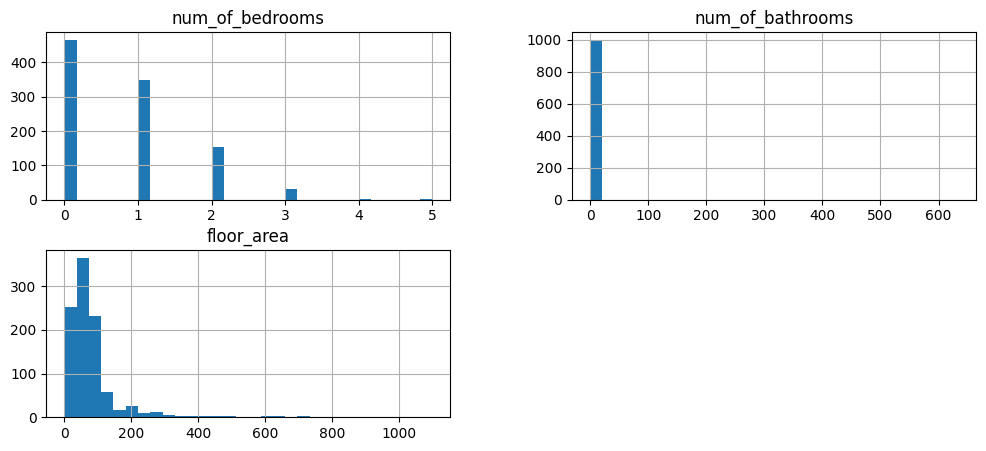

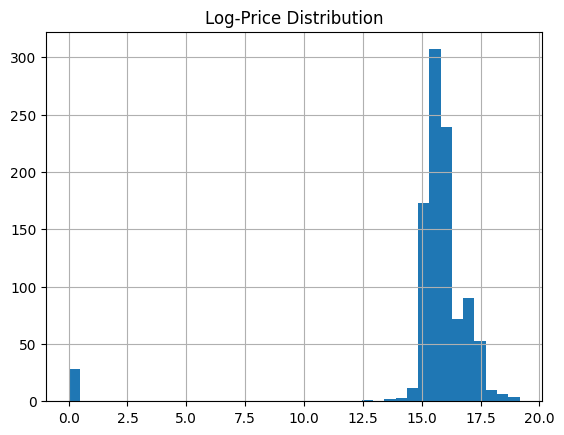

In [12]:
df[["num_of_bedrooms", "num_of_bathrooms", "floor_area"]].hist(bins=30, figsize=(12, 5))
plt.show()

df["log_price"].hist(bins=40)
plt.title("Log-Price Distribution")
plt.show()


In [13]:
os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/feature_engineered_dataset.csv", index=False)

print("Saved → data/processed/feature_engineered_dataset.csv")


Saved → data/processed/feature_engineered_dataset.csv
